<a href="https://colab.research.google.com/github/Jithesh02/music-genere-classification/blob/main/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display as lplt
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/features_30_sec.csv")

In [ ]:
df = df.drop(labels="filename", axis=1)

In [ ]:
audio_recording = "/content/drive/MyDrive/genres_original/pop/pop.00000.wav" 
data, sr = librosa.load(audio_recording, sr=45600)

In [ ]:
Audio(data, rate=sr)

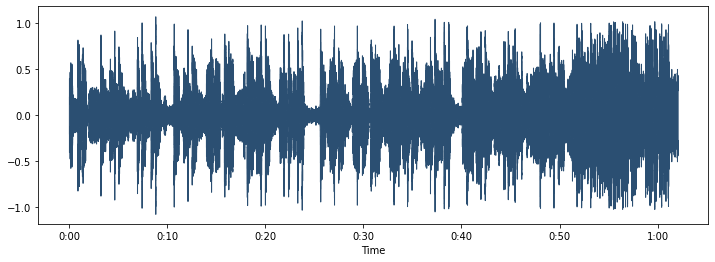

In [ ]:
plt.figure(figsize=(12, 4))
lplt.waveshow(data, color="#2b4f72")

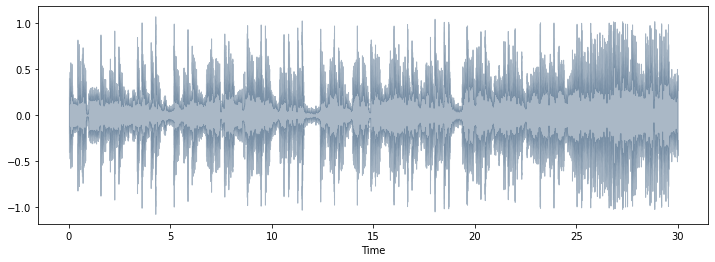

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
lplt.waveshow(data, sr=sr, alpha=0.4, color="#2b4f72")

In [ ]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(class_list)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
classes = dict(enumerate(convertor.classes_))
classes

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [ ]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
X.shape

(1000, 58)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)  


GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)  


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred) 


0.575

In [ ]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(Y_test, Y_pred)  

print(cm)  


[[18  0  0  2  0  0  1  0  0  0]
 [ 0 19  0  0  0  1  0  0  0  0]
 [ 9  0  7  1  1  0  1  0  0  2]
 [ 0  1  2  6  3  0  2  0  1  2]
 [ 0  0  0  3  7  0  6  1  3  0]
 [ 8  3  0  2  0  5  0  0  1  0]
 [ 0  0  0  2  0  0 22  0  0  0]
 [ 0  0  0  1  0  0  0 21  0  0]
 [ 5  0  3  0  0  1  0  1 10  3]
 [ 3  0  1  0  0  0  7  0  2  0]]
